In [202]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from radar_chart import radar

In [203]:
# Read csv with related columns
cols = ['Country', 'Indicator', 'Inequality', 'Unit', 'Value']
df = pd.read_csv('BLI_05052017143301063.csv', usecols=cols)

In [204]:
# Dataframe consist of a lot of information
df[df['Country'] == 'Japan']

,Country,Indicator,Inequality,Unit,Value
14,Japan,Dwellings without basic facilities,Total,Percentage,6.400000
51,Japan,Dwellings without basic facilities,Men,Percentage,6.400000
87,Japan,Dwellings without basic facilities,Women,Percentage,6.400000
123,Japan,Housing expenditure,Total,Percentage,22.000000
160,Japan,Housing expenditure,Men,Percentage,22.000000
196,Japan,Housing expenditure,Women,Percentage,22.000000
232,Japan,Rooms per person,Total,Ratio,1.900000
269,Japan,Rooms per person,Men,Ratio,1.900000
305,Japan,Rooms per person,Women,Ratio,1.900000
341,Japan,Household net adjusted disposable income,Total,US Dollar,27323.000000


In [205]:
# Use total values only to make it simpler
df = df[df['Inequality'] == 'Total']

# Reduce the number of statistics to make it simpler, 
# uses a similar formula and categorization from OECD presentation

# Normalize values
df['Value'] = df.groupby('Indicator')['Value'].apply(
    lambda x: (x - x.min()) / (x.max() - x.min()))

# since properties like homicide rate are better the lower, will process those first
neg_vals = ['Dwellings without basic facilities', 
            'Housing expenditure', 
            'Long-term unemployment rate'
            'Air pollution', 
            'Homicide rate', 
            'Employees working very long hours',
            'Labour market insecurity', 
            'Stakeholder engagement for developing regulations']
df.loc[df['Indicator'].isin(neg_vals),'Value'] = 1 - df.loc[df['Indicator'].isin(neg_vals),'Value']

In [206]:
# means of related values to create sub-groups
household = df.groupby('Country').apply(lambda x: x.loc[x['Indicator'].isin(['Dwellings without basic facilities', 
                                             'Housing expenditure', 
                                             'Rooms per person']), 'Value'].mean())
satisfaction = df.groupby('Country').apply(lambda x: x.loc[x['Indicator'].isin(['Life satisfaction']), 
                                                           'Value'].mean())                                             
employement = df.groupby('Country').apply(lambda x: x.loc[x['Indicator'].isin(['Employment rate', 
                                                'Long-term unemployment rate', 
                                                'Employees working very long hours', 
                                                'Time devoted to leisure and personal care', 
                                                'Labour market insecurity']), 'Value'].mean())
wealth = df.groupby('Country').apply(lambda x: x.loc[x['Indicator'].isin(['Household net adjusted disposable income', 
                                           'Household net financial wealth',
                                           'Personal earnings']), 'Value'].mean())
education = df.groupby('Country').apply(lambda x: x.loc[x['Indicator'].isin(['Educational attainment', 
                                              'Student skills',
                                              'Years in education']), 'Value'].mean())
health = df.groupby('Country').apply(lambda x: x.loc[x['Indicator'].isin(['Life expectancy', 
                                           'Self-reported health']), 'Value'].mean())
government = df.groupby('Country').apply(lambda x: x.loc[x['Indicator'].isin(['Quality of support network', 
                                               'Air pollution', 
                                               'Water quality', 
                                               'Voter turnout', 
                                               'Stakeholder engagement for developing regulations']), 'Value'].mean())
safety = df.groupby('Country').apply(lambda x: x.loc[x['Indicator'].isin(['Homicide rate', 
                                           'Feeling safe walking alone at night']), 'Value'].mean())

df = pd.concat([household, satisfaction, employement, wealth, education, government, safety], axis=1)
df.columns = ['Household', 'Satisfaction', 'Employement', 'Wealth', 'Education', 'Government', 'Safety']

In [207]:
def plot_country(ax, theta, v, c, l):
    ax.plot(theta, v, color='k', label='')
    ax.fill(theta, v, color=c, alpha=.5, label=l)

In [208]:
labels = df.columns
theta = radar(len(labels))

<IPython.core.display.Javascript object>


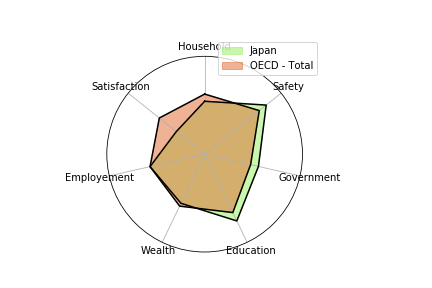

In [209]:
fig, ax = plt.subplots(subplot_kw={'projection': 'radar'})

ax.set_varlabels(labels)
ax.get_yaxis().set_ticks([])
ax.set_ylim(0, 1)

plot_country(ax, theta, df.loc['Japan'],
             np.random.rand(3, ), 'Japan')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])
ax.legend(bbox_to_anchor=(1.1, 1.1))

plt.show()

In [210]:
# can compare with another country, or OECD total
plot_country(ax, theta, df.loc['OECD - Total'],
             np.random.rand(3, ), 'OECD - Total')
ax.legend(bbox_to_anchor=(1.1, 1.1))